<h1><center>Regressão Polinomial</center></h1>

Nesta aula iremos aprender a como utilizar o scikit-learn para criar uma regressão polinomial com base nos dados de emissão de CO2 de veículos automotores.

# Importando os pacotes necessários

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

# Download dos dados
O download dos dados pode ser realizado por meio do IBM Object Storage, disponível em:

https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

##### Obs.: O arquivo deve ser salvo na mesma pasta onde este arquivo estiver salvo.


<h2>Entendendo os dados</h2>

### `FuelConsumption.csv`:
Os dados presentes no arquivo, **`FuelConsumption.csv`**, referem-se ao consumo, bem como a emissão de CO2 de veículos vendidos no Canadá. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


<h2>Lendo os dados</h2>

In [3]:
df = pd.read_csv("csv/FuelConsumptionCo2.csv")

# Exibir o cabeçalho do arquivo
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Vamos selecionar algumas características que iremos utilizar em nossa regressão:

In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


Vamos plotar um gráfico da Emissão vs Tamanho do Motor:

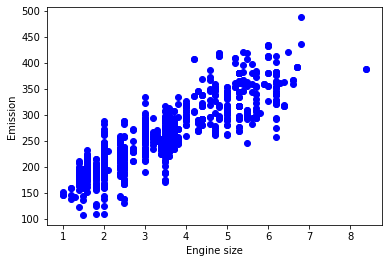

In [5]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

# Criando os daos de treinamento e de validação
Train/Test Split (Separação de dados para Treinamento/Validação) envolve separar os dados em dois conjuntos distintos. Depois disso, você treina com o conjunto de treinamento e testa com o conjunto de validação.

In [6]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

<h2>Regressão Polinomial</h2>

Às vezes, a tendência dos dados não é realmente linear e parece meio "curvado". Neste caso, podemos usar métodos de regressão polinomial. Na verdade, existem muitas regressões diferentes que podem ser usadas para se ajustar a qualquer aspecto do conjunto de dados, como quadrático, cúbico e assim por diante, e pode continuar infinitamente em graus.

Em essência, podemos chamar tudo isso de regressão polinomial, onde a relação entre a variável independente $x$ e a variável dependente $y$ é modelada como um polinômio de grau enésimo em $x$. Considere uma regressão polinomial (vamos fazer um polinômio do segundo grau):



<center>$ y = b + \theta_1 x + \theta_2 x ^ 2 $</center>


Agora, a questão é: como podemos ajustar nossos dados nessa equação enquanto temos apenas valores $x$, como __ENGINESIZE__?

Bem, podemos criar alguns recursos adicionais: 1, $ x $ e $ x ^ 2 $.

A função __PloynomialFeatures ()__ na biblioteca Scikit-learn, direciona um novo conjunto de recursos do conjunto de recursos original. Ou seja, uma matriz será gerada consistindo em todas as combinações polinomiais dos recursos com grau menor ou igual ao grau especificado. Por exemplo, digamos que o conjunto de recursos original tenha apenas um recurso, __ENGINESIZE__. Agora, se selecionarmos o grau do polinômio para ser 2, então ele gera 3 características, grau = 0, grau = 1 e grau = 2:

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]])

**fit_transform** pega nossos valores x e produz uma lista de nossos dados gerados da potência de 0 à potência de 2 (já que definimos o grau de nosso polinômio como 2).

$
\begin{bmatrix}
    v_1\\
    v_2\\
    \vdots\\
    v_n
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & v_1 & v_1^2]\\
    [ 1 & v_2 & v_2^2]\\
    \vdots & \vdots & \vdots\\
    [ 1 & v_n & v_n^2]
\end{bmatrix}
$

no nosso exemplo

$
\begin{bmatrix}
    2.\\
    2.4\\
    1.5\\
    \vdots
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & 2. & 4.]\\
    [ 1 & 2.4 & 5.76]\\
    [ 1 & 1.5 & 2.25]\\
    \vdots & \vdots & \vdots\\
\end{bmatrix}
$

Parece conjuntos utilizados para análise de regressão linear múltipla, certo? Sim.

De fato, a regressão polinomial é um caso especial de regressão linear, utiliza o mesmo princípio para a seleção dos coeficientes. Basta considerar a substituição de $ x $ por $ x_1 $, $ x ^ 2 $ por $ x_2 $ e assim por diante. Então a equação de grau 2 seria transformada em:

$ y = b + \theta_1 x_1 + \theta_2 x_2 $

Agora, podemos considerar como se fosse um problema de "regressão linear". Portanto, essa regressão polinomial é considerada um caso especial de regressão linear múltipla tradicional. Assim, você pode usar o mesmo mecanismo da regressão linear para resolver esses problemas.

Podemos usar a função __LinearRegression()__ para resolvê-lo:

In [8]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         49.06897665 -1.42421066]]
Intercept:  [110.92379948]


Como mencionado anteriormente, __Coefficient__ e __Intercept__, são os parâmetros da curva de ajuste.
Dado que é uma regressão linear múltipla típica, com 3 parâmetros, e sabendo que os parâmetros são o intercepto e os coeficientes do hiperplano, o sklearn os estimou a partir do nosso novo conjunto de dados. Vamos plotar esse ajuste:

Text(0, 0.5, 'Emission')

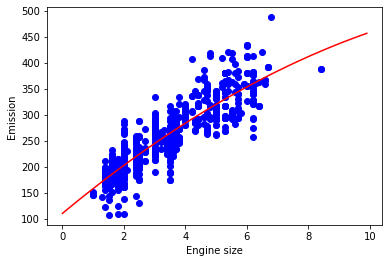

In [9]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

<h2>Validação</h2>

In [10]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 26.12
Residual sum of squares (MSE): 1155.87
R2-score: 0.61


# Prática
Tente usar uma regressão polinomial com o conjunto de dados, mas desta vez com grau três (cúbico). Isso resulta em melhor precisão?

In [72]:
# Escreva seu código abaixo

poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.   ,  2.4  ,  5.76 , 13.824],
       [ 1.   ,  1.5  ,  2.25 ,  3.375],
       [ 1.   ,  3.5  , 12.25 , 42.875],
       ...,
       [ 1.   ,  3.2  , 10.24 , 32.768],
       [ 1.   ,  3.   ,  9.   , 27.   ],
       [ 1.   ,  3.2  , 10.24 , 32.768]])

In [73]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         29.63459349  3.89407979 -0.43774929]]
Intercept:  [131.68560638]


Text(0, 0.5, 'Emission')

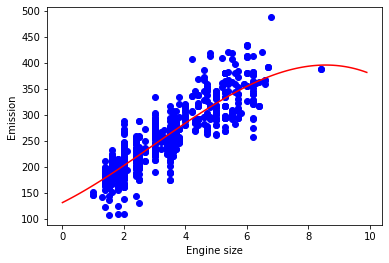

In [74]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)+ clf.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [75]:
test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 26.12
Residual sum of squares (MSE): 1150.76
R2-score: 0.62


Duplo-clique __aqui__ para a solução.

<!-- Resposta abaixo:

poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)
#The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x_poly3 = poly3.fit_transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y3_ , test_y) )


-->

Esta aula foi desenvolvida com base no material disponibilizado por Saeed Aghabozorgi

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>